In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
import torch.nn.functional as F
import json
import sys
sys.path.append("../")
sys.path.append("../../")
from denoiser import DDIM, DDPM
from sklearn.cluster import KMeans
# Set dpi for matplotlib
matplotlib.rcParams['figure.dpi'] = 200
def setdpi(x):
    matplotlib.rcParams['figure.dpi'] = x
# use latex
plt.rcParams['text.usetex'] = True
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [2]:
timesteps = 30

# Symmetric

In [26]:
print(device)
log_name = "Low2DSymMix"
ddim = DDIM.load_from_training_log(f"../../logs/training/{log_name}", model_name="ema_model.pt", device=device)
args = json.load(open(f"../../logs/training/{log_name}/args.json", "r"))
ddim.eval()
ddim.to(device);


cpu
Loading model...
Creating instance of class...
Denoiser initialized


In [36]:
ddim.eta = 0
latents = torch.randn(4000, *ddim.data_shape).to(device)
samples = ddim.sample(device, latents=latents, timesteps=timesteps)
# plt.scatter(latents[:, 0], latents[:, 1], s=1, alpha=0.2)
# plt.scatter(samples[:, 0], samples[:, 1], s=1)

### Find sample cluster centers to color data points and latents

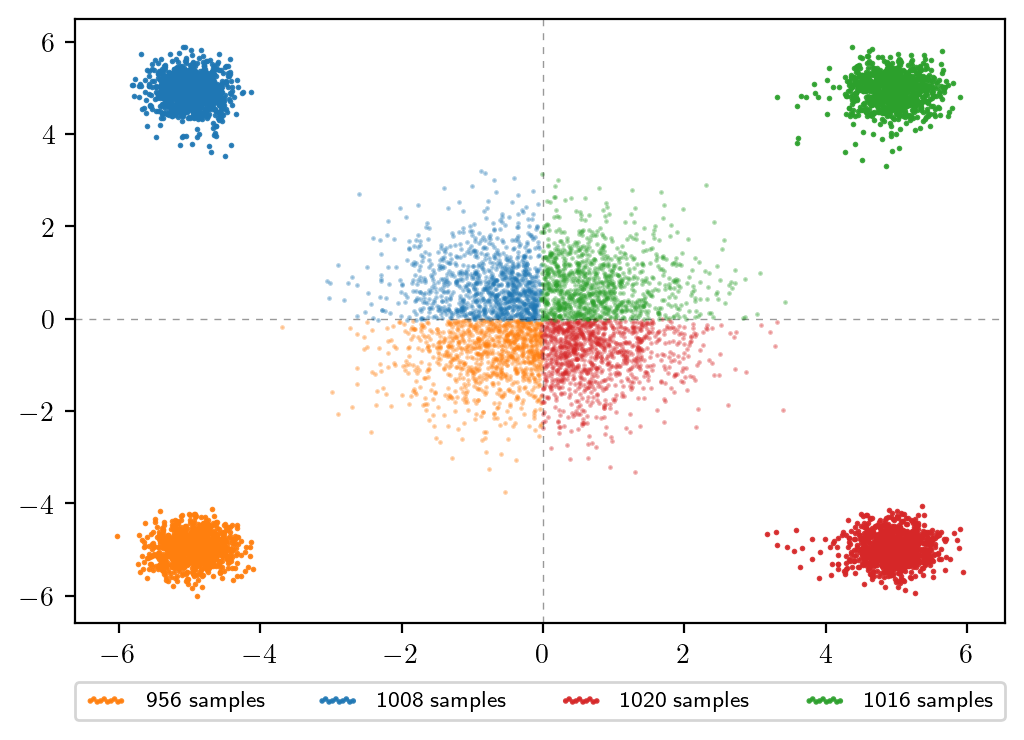

In [37]:
kmeans = KMeans(n_clusters=4, random_state=0)

kmeans.fit(samples.cpu().detach().numpy())
ids = kmeans.predict(samples.cpu().detach().numpy())

default_colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

mapping = {
    (1, 1): default_colors[2],
    (0, 1): default_colors[0],
    (0, 0): default_colors[1],
    (1, 0): default_colors[3]
}
    
unique, counts = np.unique(ids, return_counts=True)

fig, ax = plt.subplots()
# markers = ["o", "s", "v", "^"]
for i in range(kmeans.n_clusters):
    mask = ids==i
    color = mapping[tuple((kmeans.cluster_centers_[i] > 0).astype(int))]

    a = ax.scatter(samples[mask][:, 0], samples[mask][:, 1], s=1, label=f"{counts[i]} samples", alpha=0.9, color=color, rasterized=True)

    faded_color = np.array([x for x in a.get_facecolor()[0][:3]] + [1])
    # print(faded_color)
    ax.scatter(latents[mask][:, 0], latents[mask][:, 1], s=0.5, color=faded_color, alpha=0.35, rasterized=True)
    # plt.scatter(points_to_plot[:, 0], points_to_plot[:, 1], s=0.5, label=f"{counts[i]} samples", alpha=1)
    # plt.scatter(latents[mask][:, 0], latents[mask][:, 1], s=0.5, label=f"{counts[i]} samples", alpha=1)

# plot x and y axis
ax.axhline(y=0, color='k', linestyle='--', linewidth=0.5, alpha=0.4, dashes=(5, 5))
ax.axvline(x=0, color='k', linestyle='--', linewidth=0.5, alpha=0.4, dashes=(5, 5))

ax.legend(scatterpoints=10, fontsize=8, loc='upper left', bbox_to_anchor=(0.0, -0.2, 1.0, 0.102), ncol=kmeans.n_clusters, mode="expand", borderaxespad=0.0)




# fig.savefig("figures/low_dim/shortest_distance/dirt_pits_optimal_transport.pdf", bbox_inches='tight')

# Asymmetric

In [38]:
log_name = "Low2DASymMix"
ddim2 = DDIM.load_from_training_log(f"../../logs/training/{log_name}", model_name="ema_model.pt", device=device)
ddim2.eval()
ddim2.to(device);


Loading model...
Creating instance of class...
Denoiser initialized


In [39]:
ddim2.eta = 0
latents2 = torch.randn(4000, *ddim.data_shape).to(device)
samples2 = ddim2.sample(device, latents=latents2, timesteps=timesteps)
# plt.scatter(latents[:, 0], latents[:, 1], s=1, alpha=0.2)
# plt.scatter(samples2[:, 0], samples2[:, 1], s=1)

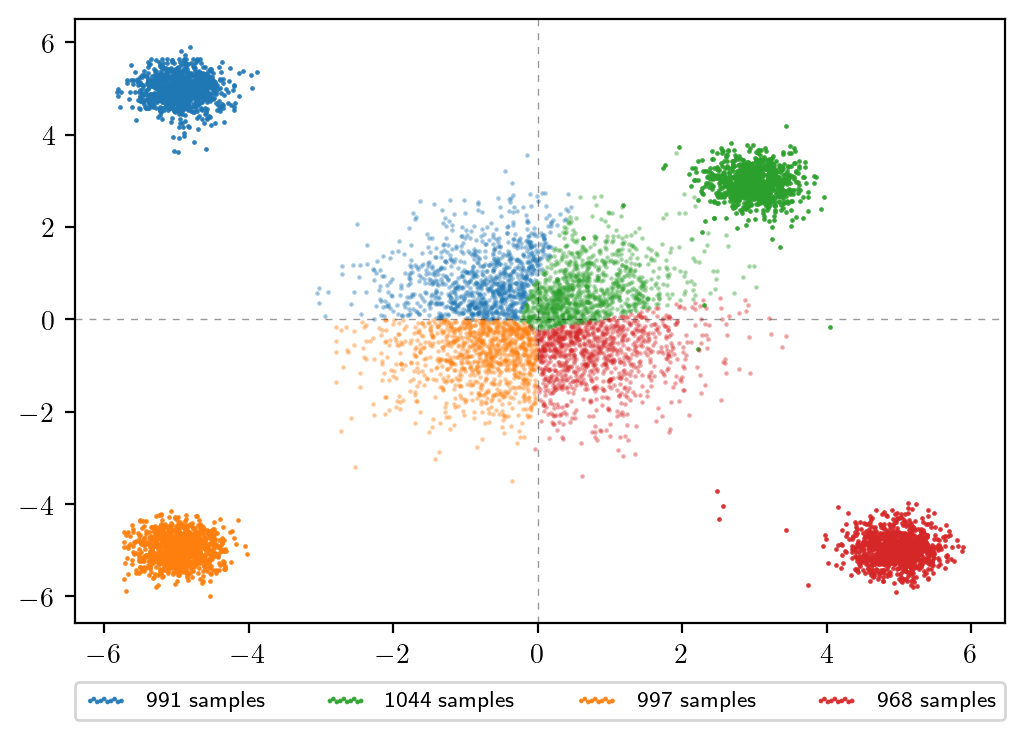

In [40]:
kmeans2 = KMeans(n_clusters=4, random_state=0)

kmeans2.fit(samples2.cpu().detach().numpy())
ids2 = kmeans2.predict(samples2.cpu().detach().numpy())

unique2, counts2 = np.unique(ids2, return_counts=True)

fig2, ax2 = plt.subplots()


for i in range(kmeans2.n_clusters):
    mask = ids2==i
    # points_to_plot = torch.cat([latents[mask], samples[mask]], dim=0)
    color = mapping[tuple((kmeans2.cluster_centers_[i] > 0).astype(int))]
    a = ax2.scatter(samples2[mask][:, 0], samples2[mask][:, 1], s=0.5, label=f"{counts2[i]} samples", alpha=0.9, color=color, rasterized=True)
    # faded_color = np.array([x for x in a.get_facecolor()[0][:3]] + [1])
    ax2.scatter(latents2[mask][:, 0], latents2[mask][:, 1], s=0.5, color=color, alpha=0.35, rasterized=True)

# plot x and y axis
ax2.axhline(y=0, color='k', linestyle='--', linewidth=0.5, alpha=0.4, dashes=(5, 5))
ax2.axvline(x=0, color='k', linestyle='--', linewidth=0.5, alpha=0.4, dashes=(5, 5))


ax2.legend(scatterpoints=10, fontsize=8, loc='upper left', bbox_to_anchor=(0.0, -0.2, 1.0, 0.102), ncol=kmeans2.n_clusters, mode="expand", borderaxespad=0.0)

fig2.savefig("figures/low_dim/shortest_distance/dirt_pits_uneven_optimal_transport.pdf", bbox_inches='tight')